In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import pickle
import os


from training import *
from models import *
from A2C_agent import *
from helpers import *

%load_ext autoreload
%autoreload 2

### Load data and agents

To produce all plots

In [ ]:

# # Load all_* dictionaries
# agent_name = "chose the agent" # for example 'agent5'
# with open('data/'+agent_name+'_data/all_dicts.pkl', 'rb') as f:
#     all_critic_losses, all_actor_losses, all_episode_rewards, \
#         all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories = pickle.load(f)

# # Load agent1 dictionary
# with open('data/'+agent_name+'_data/agent1.pkl', 'rb') as f:
#     agent1 = pickle.load(f)


# 4.2 Agent 5: Evaluating the CartPole agent in the new environment
### vanilla A2C (fully-online, n=1,k=1), continuous action space

In [2]:
# hyperparameters
stochastic_rewards = True
continuous = True
k=1
n=1
lr_actor=1e-5
lr_critic=1e-3
total_steps_budget = 500000
device = "cpu"
seeds = [734289, 324, 80435]

agent, \
all_critic_losses, all_actor_losses, all_episode_rewards, \
all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories \
= training_loop(k, n, continuous, seeds, lr_actor, lr_critic, total_steps_budget, stochastic_rewards, device)

---- Proceeding to evaluate model 0 ... ----
 Mean reward: 61.10, Std reward: 8.53, total steps: 20000
----     Evaluation finished        ----
---- Proceeding to evaluate model 0 ... ----
 Mean reward: 249.30, Std reward: 34.07, total steps: 40000
----     Evaluation finished        ----
---- Proceeding to evaluate model 0 ... ----
 Mean reward: 471.10, Std reward: 101.98, total steps: 60000
----     Evaluation finished        ----
---- Proceeding to evaluate model 0 ... ----
 Mean reward: 1000.00, Std reward: 0.00, total steps: 80000
----     Evaluation finished        ----
---- Proceeding to evaluate model 0 ... ----
 Mean reward: 1000.00, Std reward: 0.00, total steps: 100000
----     Evaluation finished        ----
---- Proceeding to evaluate model 0 ... ----
 Mean reward: 949.70, Std reward: 7.43, total steps: 120000
----     Evaluation finished        ----
---- Proceeding to evaluate model 0 ... ----
 Mean reward: 1000.00, Std reward: 0.00, total steps: 140000
----     Evaluatio

### training logging info

- losses and rewards are every 1k step
- evaluation rewards and value_trajectories are every 20k steps

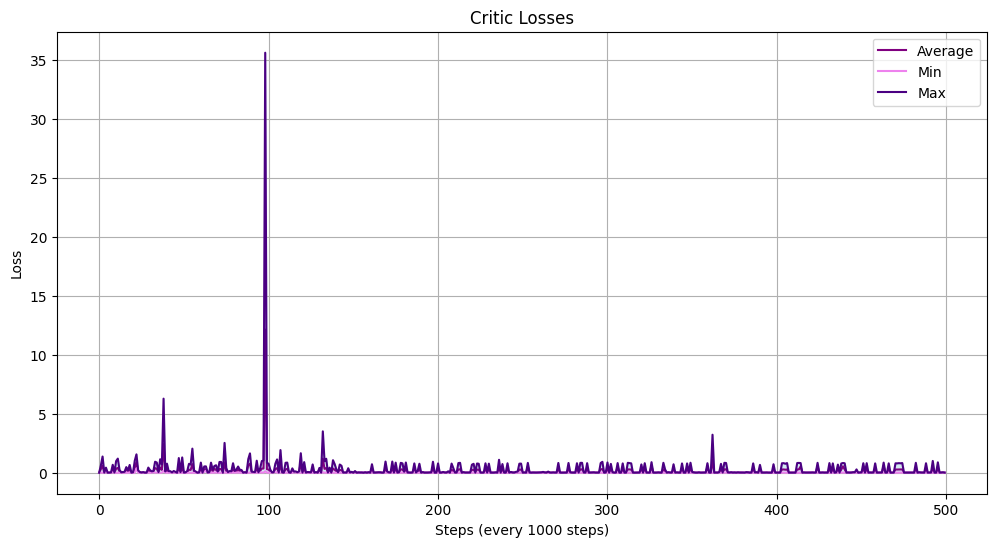

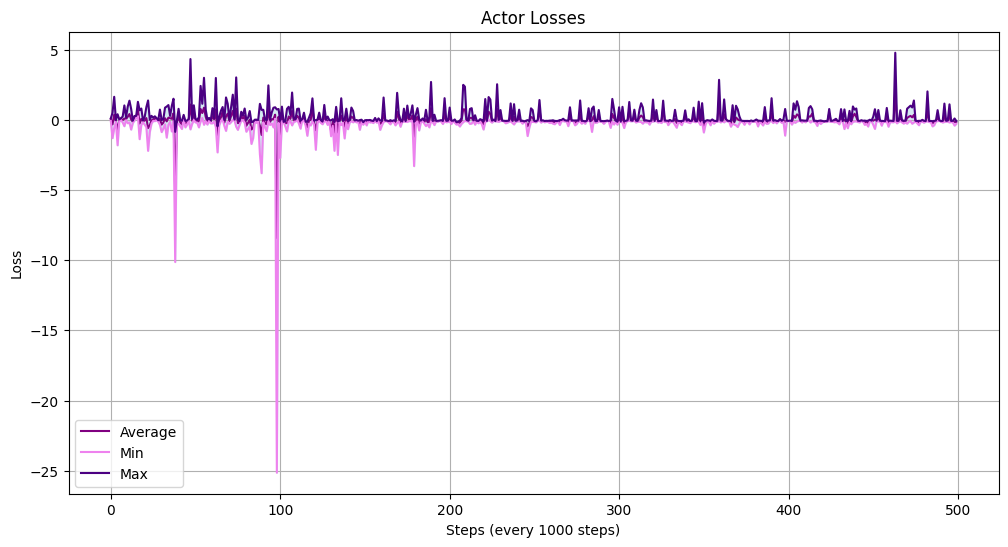

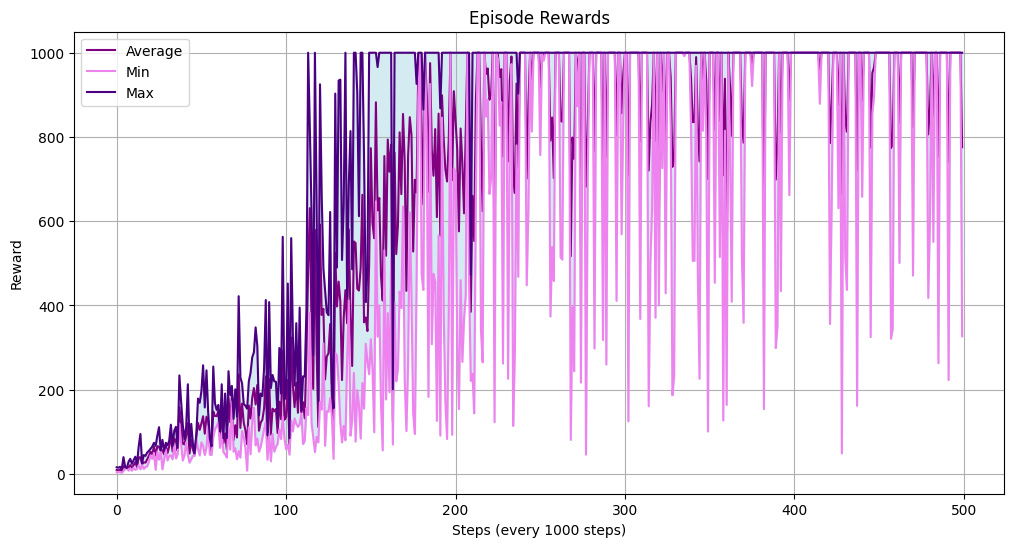

In [3]:
# Get stats 
min_critic_losses, max_critic_losses, avg_critic_losses = get_stats(all_critic_losses)
min_actor_losses, max_actor_losses, avg_actor_losses = get_stats(all_actor_losses)
min_episode_rewards, max_episode_rewards, avg_episode_rewards = get_stats(all_episode_rewards)

save_plots = True
folder_name = 'agent5'

# Plot stats 
plot_stats(save_plots, folder_name, min_critic_losses, max_critic_losses, avg_critic_losses, title='Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_stats(save_plots, folder_name, min_actor_losses, max_actor_losses, avg_actor_losses, title='Actor Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_stats(save_plots, folder_name, min_episode_rewards, max_episode_rewards, avg_episode_rewards, title='Episode Rewards', ylabel='Reward', xlabel='Steps (every 1000 steps)')

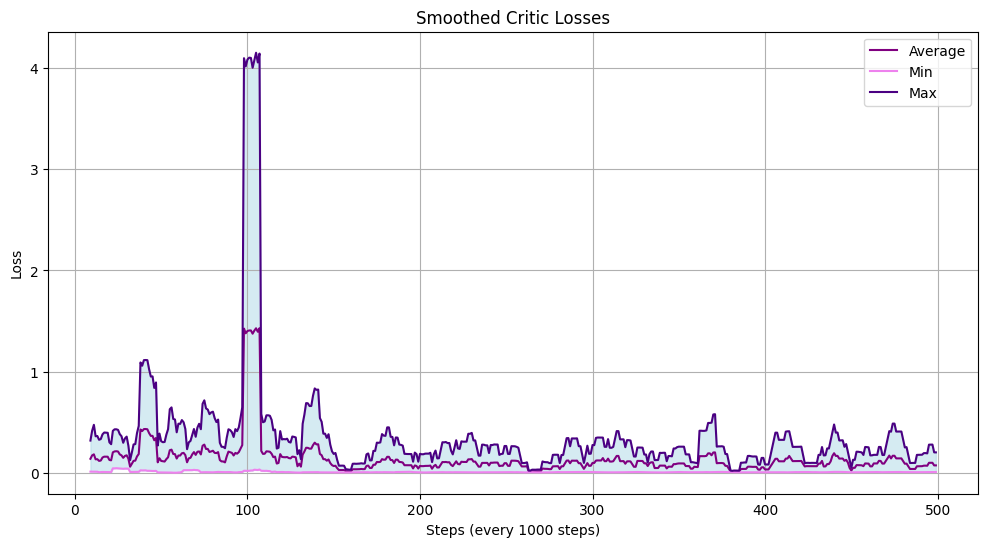

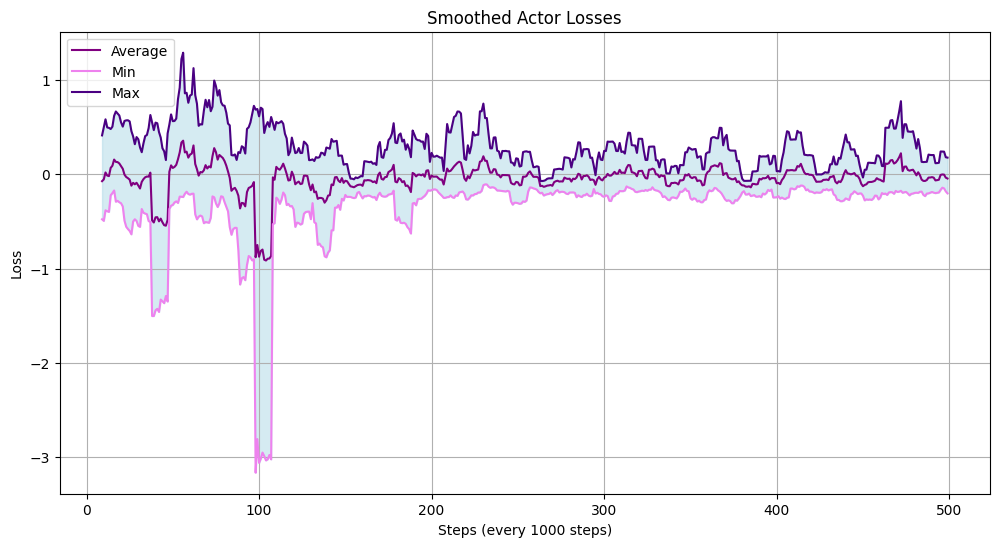

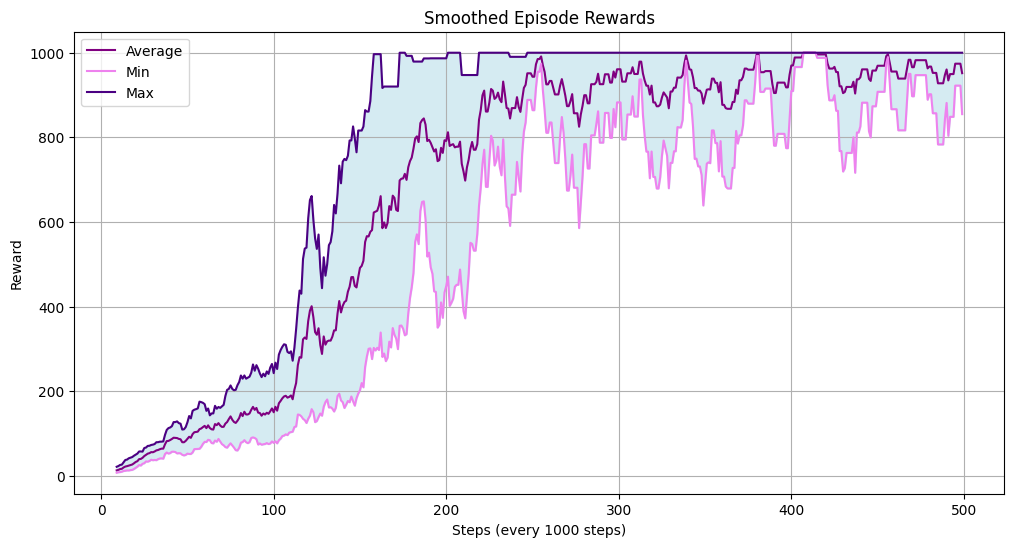

In [4]:
# Plot smoothed stats 
window_size = 10

plot_smoothed_stats(save_plots, folder_name, min_critic_losses, max_critic_losses, avg_critic_losses, window_size, title='Smoothed Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_smoothed_stats(save_plots, folder_name, min_actor_losses, max_actor_losses, avg_actor_losses, window_size, title='Smoothed Actor Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_smoothed_stats(save_plots, folder_name, min_episode_rewards, max_episode_rewards, avg_episode_rewards, window_size, title='Smoothed Episode Rewards', ylabel='Reward', xlabel='Steps (every 1000 steps)')

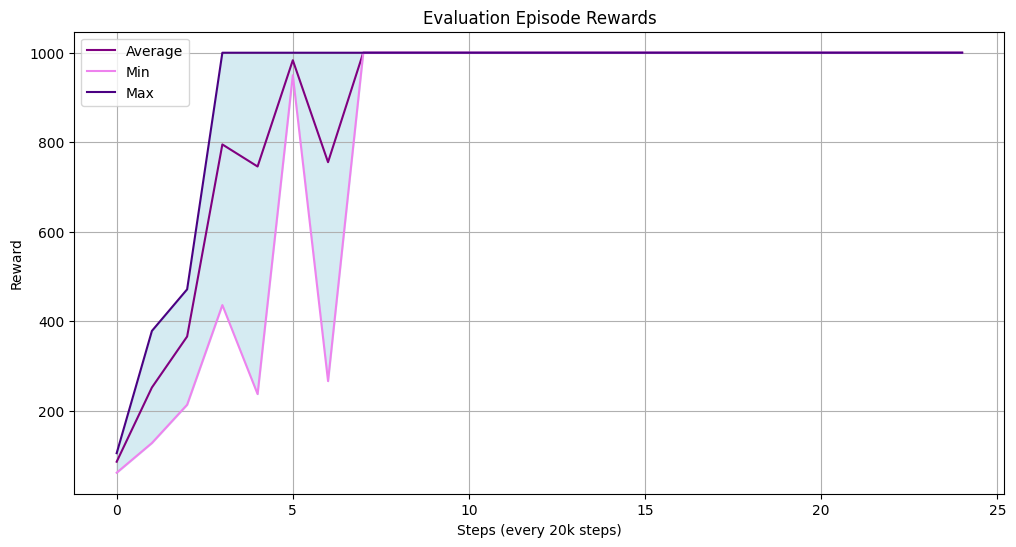

In [5]:
# Get stats for evaluation rewards
min_eval_rew, max_eval_rew, avg_eval_rew = get_stats(all_evaluation_reward_means)

# Plot stats
plot_stats(save_plots, folder_name, min_eval_rew, max_eval_rew, avg_eval_rew, title='Evaluation Episode Rewards',ylabel='Reward',xlabel='Steps (every 20k steps)')

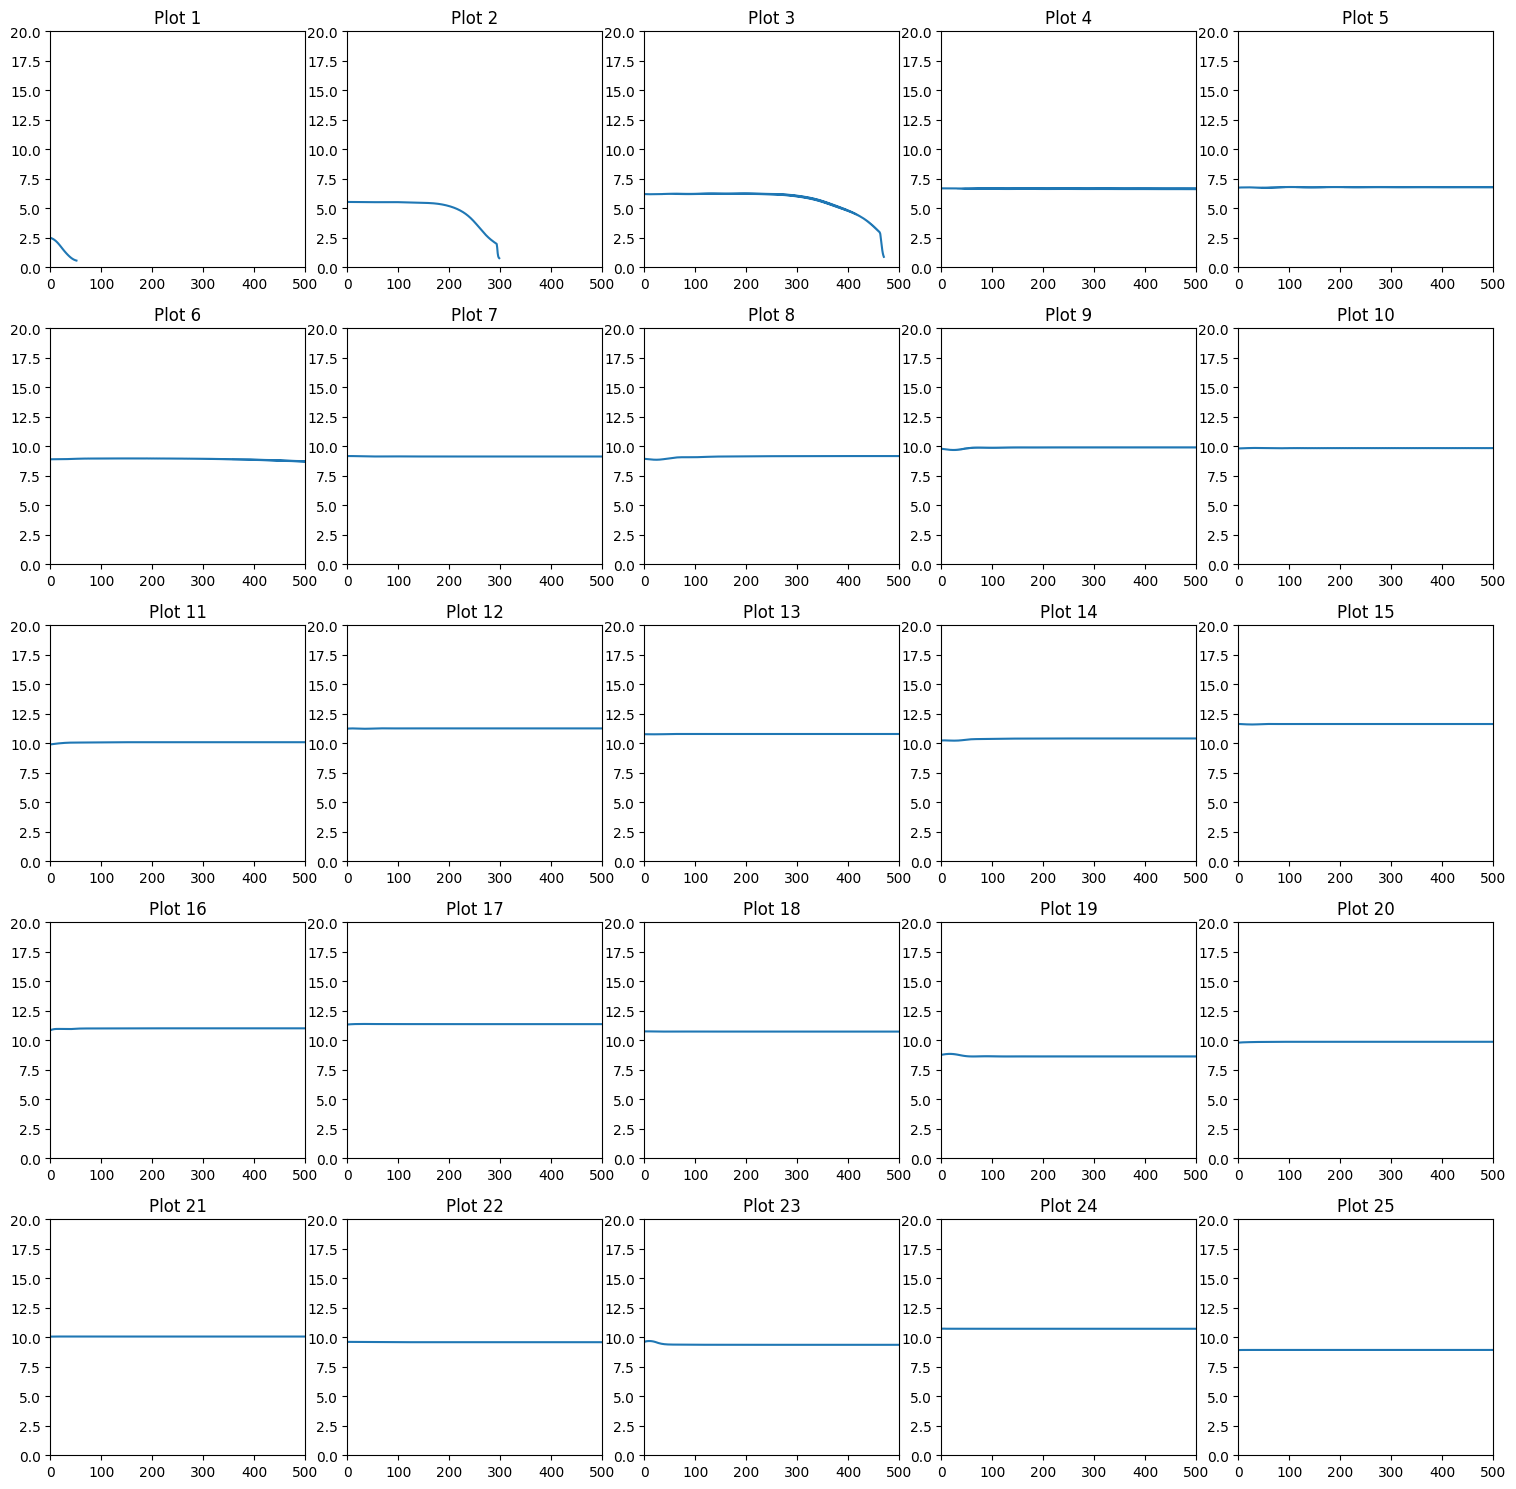

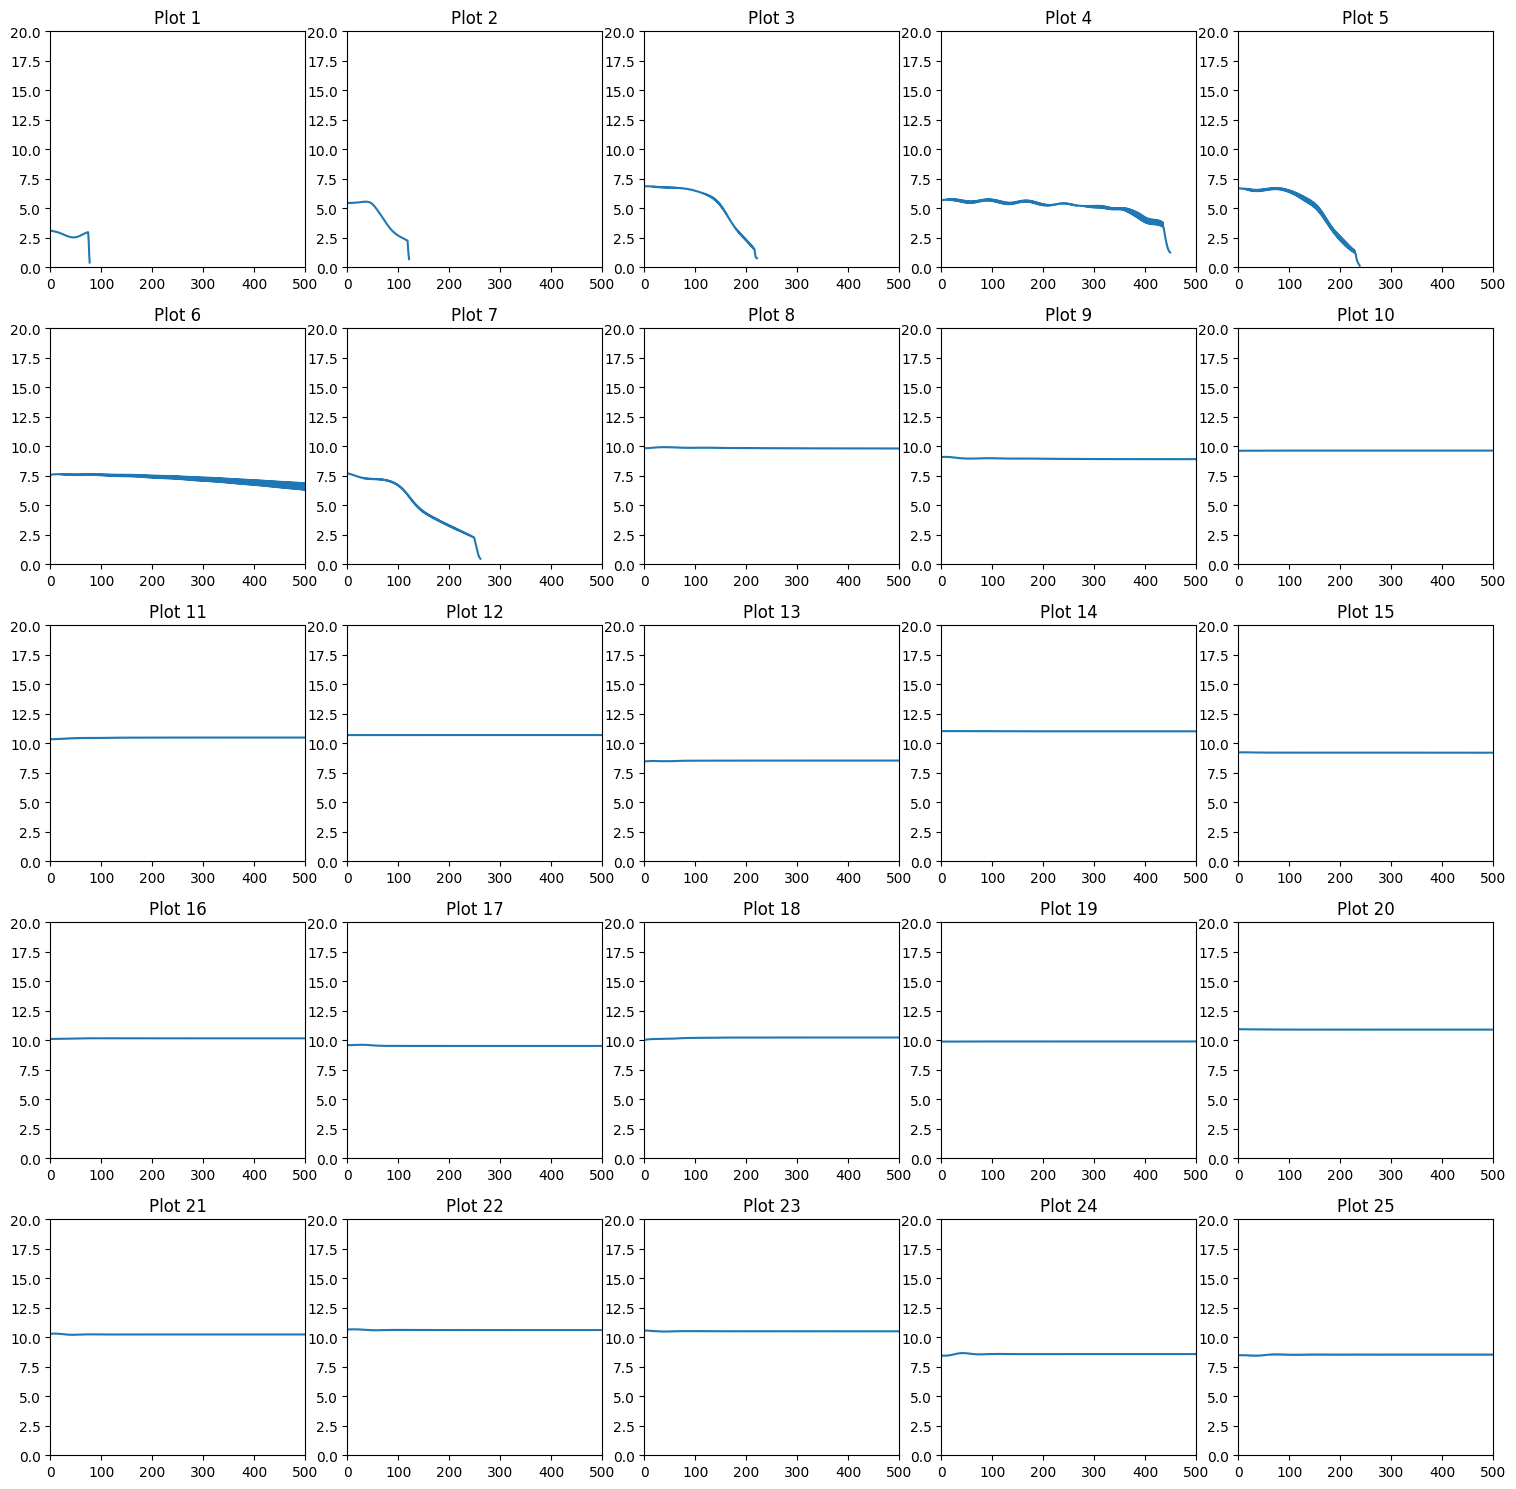

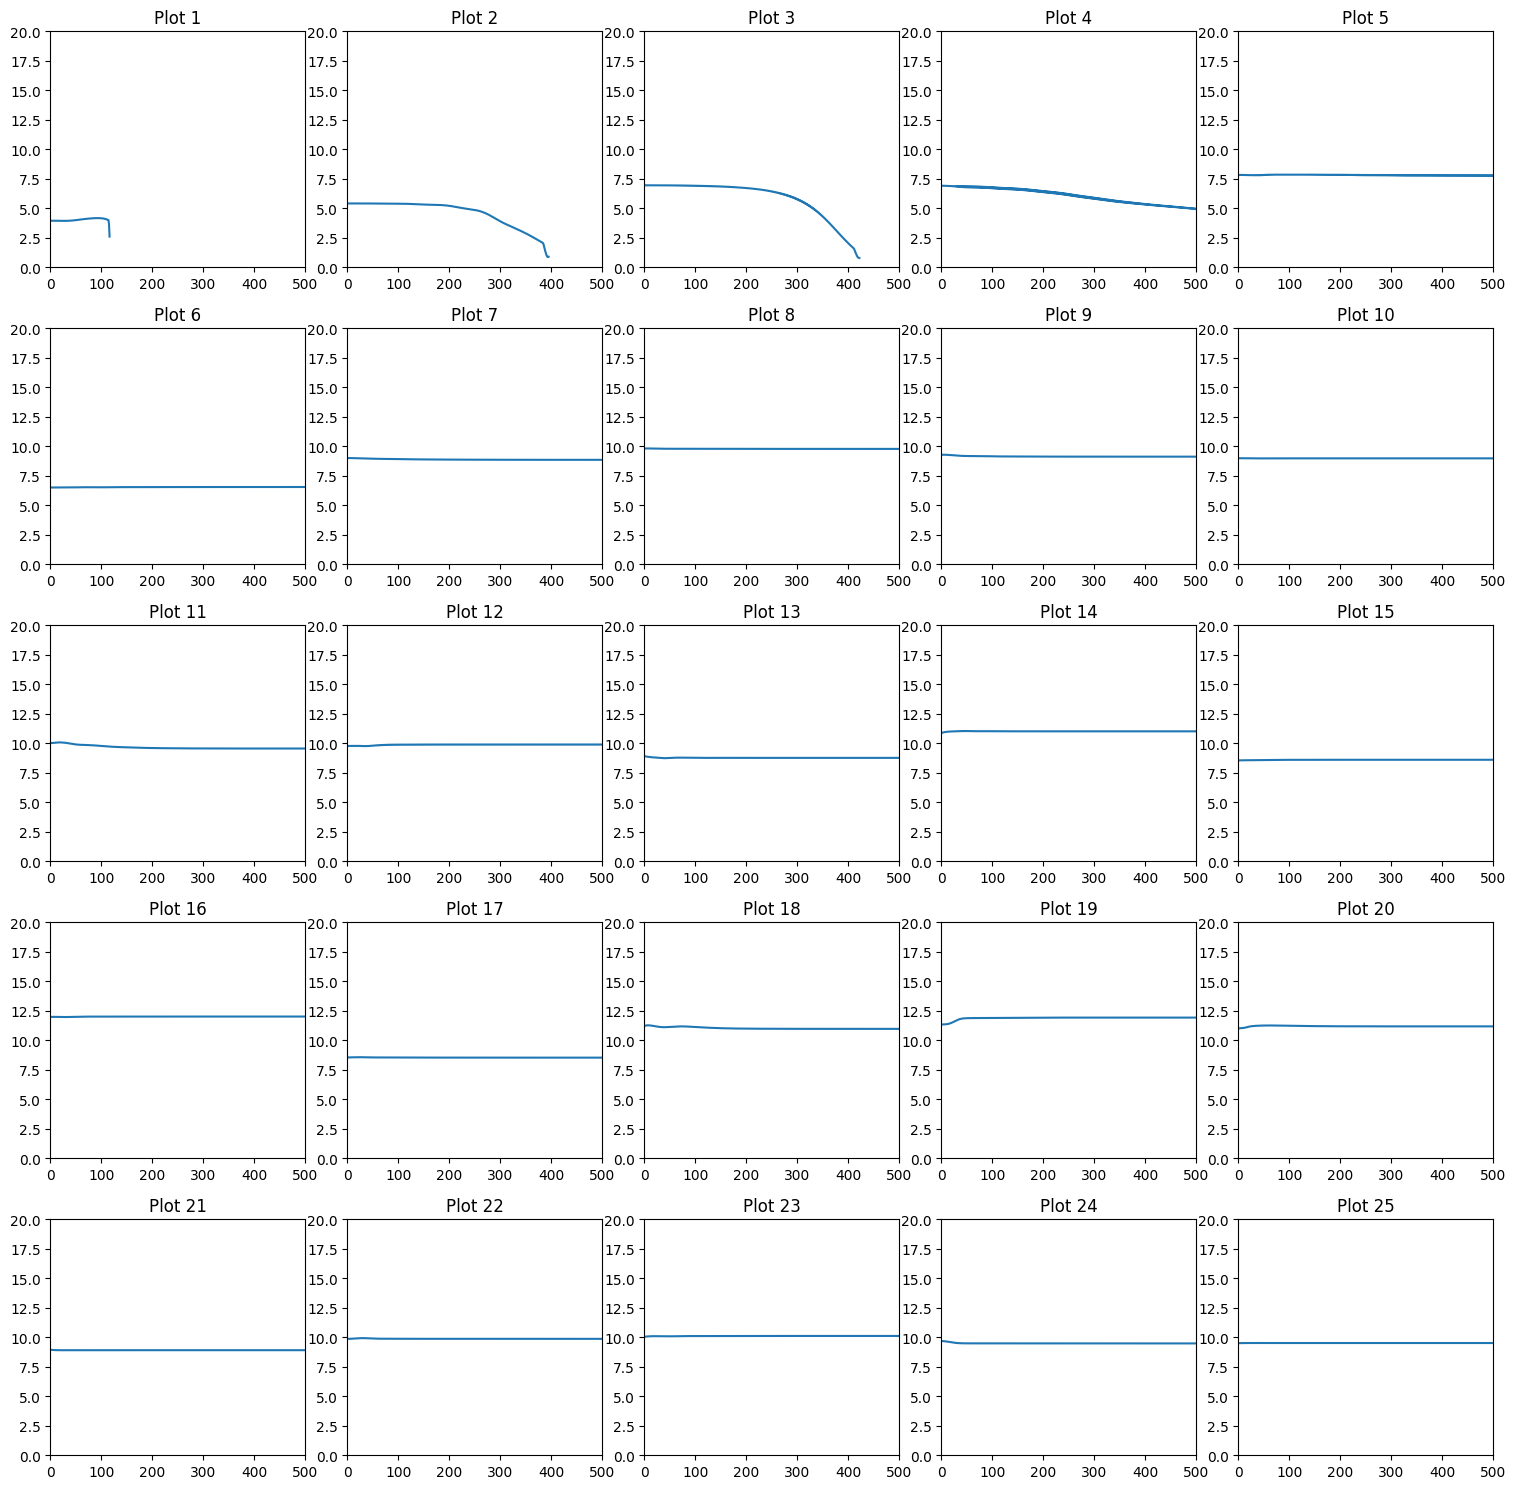

In [6]:
plot_and_save_trajectories(save_plots, folder_name, all_evaluation_value_trajectories, x_range=[0, 500], y_range=[0, 20])


### saving agents and data

In [7]:
folder_name = "data/data_agent5"

os.makedirs(folder_name, exist_ok=True)

# # Save all_* dictionaries
with open(folder_name+'/all_dicts.pkl', 'wb') as f:
    pickle.dump([all_critic_losses, all_actor_losses, all_episode_rewards, \
                 all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories], f)

# Save agent3 dictionary
with open(folder_name+'/agent.pkl', 'wb') as f:
    pickle.dump(agent, f)

# # Save seed list used for training
with open(folder_name+'/seeds.pkl', 'wb') as f:
    pickle.dump(seeds, f)